<a href="https://colab.research.google.com/github/datagrad/Learning-Python/blob/main/1_Basic_Statistics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Tendency and Dispersion

Central Tendency and dispersion are the concepts used to check the data distribution.
The distribution of dat can be examined in three step exploration:


1.   Local Concentration:
      This involves checking the basic statistical figure like **Mean, Median, Mode, Quantile, Percentile**.



2.   Dispersion: 
      This involves checking the data dispersion from the local concentration point. **Standard Deviation and Variance** are the measures used to check dispersion.

3.   Shape:
      This involves checking how data is distributed around Local Concentration Points using plot. This is done by **Skewness and Kurtosis** check.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datagrad/Learning-Python/main/Marks%20Data.csv')
df.head()

,Roll_Code,Math,English,Science,Total
0,2022_B10001,100,35,72,207
1,2019_B10002,0,57,77,134
2,2019_B10003,86,19,53,158
3,2022_A10004,14,29,69,112
4,2022_B10005,8,89,88,185


## 2. Local Concentration

### Mean

In [3]:
from statistics import mean

a1 = df['Total'].mean() # pandas function
a2 = mean(df['Total'])  # statistics function
a3 = np.mean(df['Total']) # numpy mean

print(f'{a1}, {a2}, {a3}')

164.61990081586947, 164.61990081586947, 164.61990081586947


### Mode

In [4]:
from statistics import mode
from scipy import stats

a1 = df['Total'].mode() # pandas function
#a2 = mode(df['Total'])  # statistics function
a3 = stats.mode(df['Total']) # stats function

print(f'{a1}, {a3}')

0    163
dtype: int64, ModeResult(mode=array([163]), count=array([83]))


### Median

In [5]:
from statistics import median

a1 = df['Total'].median() # pandas function
a2 = median(df['Total'])  # statistics function
a3 = np.median(df['Total']) # numpy function

print(f'{a1}, {a2}, {a3}')

165.0, 165, 165.0


### Quartle

In [6]:
Q1 = np.percentile(df["Total"], 25)
Q2 = np.percentile(df["Total"], 50)
Q3 = np.percentile(df["Total"], 75)

print("1st Quartile: ",Q1)
print("2nd Quartile: ",Q2)
print("3rd Quartile: ",Q3)



1st Quartile:  134.0
2nd Quartile:  165.0
3rd Quartile:  196.0


### Percentile


In [7]:
P90th = np.percentile(df["Total"], 90)


print("90th percentile: ",P90th)

90th percentile:  222.0


In [8]:
P10th = np.percentile(df["Total"], 10)


print("10th percentile: ",P10th)

10th percentile:  106.0


## 3. Dispersion

### Standard Deviation

In [9]:
from statistics import stdev

a1 = df['Total'].std() # pandas function
a2 = stdev(df['Total'])  # statistics function
a3 = np.std(df['Total']) # numpy function

print(f'{a1}, {a2}, {a3}')

44.566970521835685, 44.56697052183557, 44.563405591979816


### Variance

In [10]:
from statistics import variance

a1 = df['Total'].var() # pandas function
a2 = variance(df['Total'])  # statistics function
a3 = np.var(df['Total']) # numpy function

print(f'{a1}, {a2}, {a3}')

1986.214861494171, 1986.214861494161, 1985.8971179552982


## 4. Shape

### Skewness

In [11]:
from scipy.stats import skew

a1 = df['Total'].skew() # pandas function
a2 = skew(df['Total'])  # scipy stats

print(a1, a2)

-0.03064463280716832 -0.03063727878164809


### Kurtosis

In [12]:
from scipy.stats import kurtosis

a1 = df['Total'].kurt() # pandas function
a2 = kurtosis(df['Total'])  # scipy stats

print(a1, a2)

-0.37278369065806904 -0.3734452710863301


## 5. Describe Method

In [13]:
df.describe()

,Math,English,Science,Total
count,6251.000000,6251.000000,6251.000000,6251.000000
mean,49.988002,54.266037,60.365861,164.619901
std,29.430330,24.996014,23.153333,44.566971
min,0.000000,11.000000,21.000000,43.000000
25%,25.000000,33.000000,40.000000,134.000000
50%,50.000000,54.000000,61.000000,165.000000
75%,75.000000,75.500000,81.000000,196.000000
max,100.000000,97.000000,99.000000,288.000000


## 6. Visualization

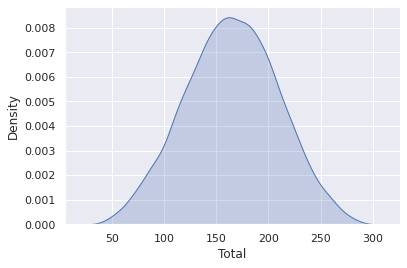

In [14]:
# Density Plot

import seaborn as sns

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)


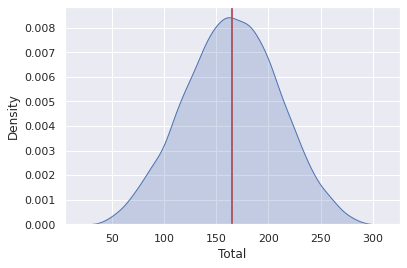

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)

plt.axvline(df['Total'].mean(), 0, 1)                         # Darw Mean Line
plt.axvline(df['Total'].median(), 0, 1, color='r')            # Darw Median Line


In [16]:
# Insert 25 percentile and 75 percentile Line
result = df.describe()
result.Total                        # Created result df with values

count    6251.000000
mean      164.619901
std        44.566971
min        43.000000
25%       134.000000
50%       165.000000
75%       196.000000
max       288.000000
Name: Total, dtype: float64

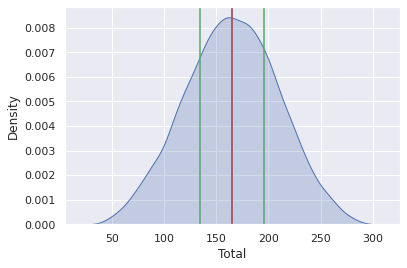

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)

plt.axvline(df['Total'].mean(), 0, 1)                         # Darw Mean Line
plt.axvline(df['Total'].median(), 0, 1, color='r')            # Darw Median Line

plt.axvline(result['Total']['25%'], 0, 1, color='g')            # Darw 25 Percentile Line
plt.axvline(result['Total']['75%'], 0, 1, color='g')            # Darw 75th Percentile Line

In [18]:
# Upper and Lower Outliners 

# IQR=Q3-Q1
IQR = result['Total']['75%']-result['Total']['25%']


# Upper Outliner = Q3 + (1.5*IQR)
upper_Outliner = result['Total']['75%']+(1.5*IQR)

# Lower Outliner = Q1 - (1.5*IQR)
lower_Outliner = result['Total']['25%']-(1.5*IQR)


print(lower_Outliner)
print(upper_Outliner)



41.0
289.0


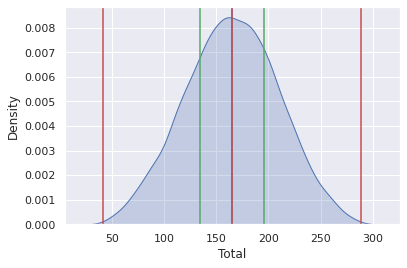

In [19]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)

plt.axvline(df['Total'].mean(), 0, 1)                         # Darw Mean Line
plt.axvline(df['Total'].median(), 0, 1, color='r')            # Darw Median Line

plt.axvline(result['Total']['25%'], 0, 1, color='g')            # Darw 25 Percentile Line
plt.axvline(result['Total']['75%'], 0, 1, color='g')            # Darw 75th Percentile Line

plt.axvline(upper_Outliner, 0, 1, color ='r')                  # Upper Outliner
plt.axvline(lower_Outliner, 0, 1, color ='r')                  # Lower Outliner